### Salma Achour
### saifeddine ouled abidi ensir
### laroussi Mohamed
### Ilyes benDakhlia

# LAB2 :
TensorFlow propose des API de haut et de bas niveau pour le Deep Learning. L'architecture de réseau de neurones la plus fondamentale est les réseaux de neurones constitués par des couches denses. Ce sont des couches entièrement connectées. Toutes les entrées et sorties sont connectées à tous les neurones de chaque couche. Keras est une API de haut niveau qui s'exécute sur TensorFlow (et CNTK ou Theano).  Lorsqu'on construis un modèle deep learning, on commence toujours par Keras afin de pouvoir se familiariser rapidement avec différentes architectures et paramètres. 

Keras possède les fonctionnalités clés suivantes:
Il permet au même code de s'exécuter sur le processeur ou le GPU.
Il dispose d'une API conviviale qui facilite le prototypage rapide.
Il a un support intégré pour les réseaux convolutionnels, les réseaux récurrents (pour le traitement de séquence) et toute combinaison des deux.
Il supporte des architectures de réseaux arbitraires: modèles multi-entrées ou multi-sorties,
partage de couches, partage de modèles, etc.

Avant l'étape d'entraînement, nous devons choisir trois choses :
<p> **loss function :** Comment le réseau pourra mesurer ses performances sur les données d'entraînement</p>
 <p> **optimizer :** le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa loss function.</p>
 <p>**Metrics :** à évaluer pendant l'entraînement et le test (exp : accuracy )
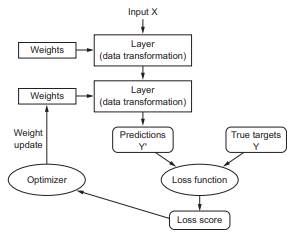

**Commencer avec Keras:**
    
Le workflow typique de Keras est comme suit :
 <p>1. Définissez vos données d'entraînement: tenseurs d'entrée et tenseurs cibles.</p>
 <p>2. Définissez un réseau de couches (ou modèle) qui mappe vos entrées à vos cibles.</p>
 <p>3. Configurez le processus d'apprentissage en choisissant une fonction d'erreur , un optimiseur et
quelques mesures à surveiller.</p>
 <p>4. Répétez vos données d'entraînement en appelant la méthode fit () de votre modèle.</p>

Il existe deux façons de définir un modèle: en utilisant la classe Sequential (uniquement pour les piles linéaires de couches) ou l'API fonctionnelle (pour les graphiques acycliques, qui vous permet de construire des architectures complètement arbitraires ).

***Coder la fonction XOR with Keras and TensorFlow !***


In [1]:
#Importation des bibliotheques 
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt



I- Selectionner les données d'entraînement:
Maintenant nous allons initialiser notre training_data. C'est un tableau à deux dimensions (0,0),(1,0),(0,1) et (1,1). Il faut préciser leurs labels .
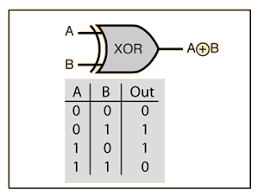

In [2]:
# the four different states of the XOR gate
training_data= np.array([[0,0],[0,1],[1,0],[1,1]])

# the four expected results in the same order
Labels =np.array([[0],[1],[1],[0]])


II- Définissez un réseau de couches
<p>Maintenant , nous passons à l'initialisation du modele en utilisant la classe Sequential. Aprés nous allons ajouter une couche Dense avec 8 unités et une fonction d'activation RELU . 
La deuxieme couche Dense contient un seul neurone avec une fonction d'activation SIGMOID </p>

In [3]:
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

III- Configurez le processus d'apprentissage
<p>SGD, ou descente de gradient stochastique, est l'algorithme d'optimisation "classique". Dans SGD, nous calculons le gradient de la fonction loss par rapport à chaque poid. Chaque passage vers l'avant à travers le réseau entraîne une certaine fonction de perte paramétrée(nous allons choisir la fonction mean_squared_error). Les nouveaux poids générés à chaque itération seront toujours strictement meilleurs que les anciens de l'itération précédente. Nous allons fixer le learning rate à 0.1. </p>


In [4]:
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [5]:

history=model.fit(training_data, Labels, batch_size=1, nb_epoch=100, verbose=0)
print(np.around(model.predict_proba(training_data)))


[[1.]
 [1.]
 [1.]
 [0.]]


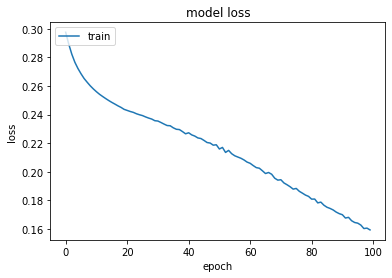

In [6]:
# Traçage de la courbe du Loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

 Travail demandé 1 : Vous allez coder les portes logiques AND et OR avec Keras

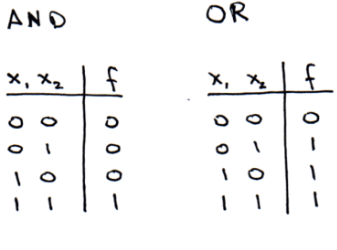

**Probleme de classification d'IRIS :** <p>Dans cet exemple on a utilisé le One-hot-encoding, ça consiste à représenter des états en utilisant pour chacun une valeur dont la représentation binaire n'a qu'un seul chiffre.les valeurs des hyper-paramètres initialisées au hasard , donnent une faible accuracy, le  défi d'aujourd'hui est de trouver les hyper-paramètres optimaux et utiliser la commande train_test_split  de scikit-learn pour faire la validation sur données jamais utilisées</p>


In [7]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam



iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(4, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(8, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = SGD(lr=0.001)
model.compile(optimizer, loss='mse', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=1, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]));
print('Final test set accuracy: {:4f}'.format(results[1]));

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 20        
_________________________________________________________________
fc2 (Dense)                  (None, 8)                 40        
_________________________________________________________________
output (Dense)               (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
None
Train on 120 samples
Epoch 1/200


/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


120/120 [==============================] - 1s 9ms/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 2/200
120/120 [==============================] - 0s 791us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 3/200
120/120 [==============================] - 0s 763us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 4/200
120/120 [==============================] - 0s 801us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 5/200
120/120 [==============================] - 0s 706us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 6/200
120/120 [==============================] - 0s 728us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 7/200
120/120 [==============================] - 0s 834us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 8/200
120/120 [==============================] - 0s 828us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 9/200
120/120 [==============================] - 0s 865us/sample - loss: 0.4551 - accuracy: 0.3167
Epoch 10/200
120/120 [==============================] - 0s 1ms/sample

120/120 [==============================] - 0s 1ms/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 79/200
120/120 [==============================] - 0s 709us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 80/200
120/120 [==============================] - 0s 702us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 81/200
120/120 [==============================] - 0s 689us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 82/200
120/120 [==============================] - 0s 689us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 83/200
120/120 [==============================] - 0s 751us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 84/200
120/120 [==============================] - 0s 689us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 85/200
120/120 [==============================] - 0s 853us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 86/200
120/120 [==============================] - 0s 830us/sample - loss: 0.4549 - accuracy: 0.3167
Epoch 87/200
120/120 [==============================] - 0s 74

Epoch 155/200
120/120 [==============================] - 0s 720us/sample - loss: 0.4543 - accuracy: 0.3167
Epoch 156/200
120/120 [==============================] - 0s 763us/sample - loss: 0.4543 - accuracy: 0.3167
Epoch 157/200
120/120 [==============================] - 0s 758us/sample - loss: 0.4543 - accuracy: 0.3167
Epoch 158/200
120/120 [==============================] - 0s 841us/sample - loss: 0.4543 - accuracy: 0.3167
Epoch 159/200
120/120 [==============================] - 0s 1ms/sample - loss: 0.4543 - accuracy: 0.3167
Epoch 160/200
120/120 [==============================] - 0s 805us/sample - loss: 0.4542 - accuracy: 0.3167
Epoch 161/200
120/120 [==============================] - 0s 666us/sample - loss: 0.4542 - accuracy: 0.3167
Epoch 162/200
120/120 [==============================] - 0s 795us/sample - loss: 0.4542 - accuracy: 0.3167
Epoch 163/200
120/120 [==============================] - 0s 769us/sample - loss: 0.4542 - accuracy: 0.3167
Epoch 164/200
120/120 [================

# AND

In [44]:
# the four different states of the XOR gate
training_data_and= np.array([[0,0],[0,1],[1,0],[1,1]])

# the four expected results in the same order
Labels_and =np.array([[0],[0],[0],[1]])


In [45]:
model_and = Sequential()
model_and.add(Dense(8, input_dim=2, activation='relu'))
model_and.add(Dense(1, activation='sigmoid'))

In [46]:
sgd = SGD(lr=0.1)
model_and.compile(loss='mean_squared_error', optimizer=sgd)
print(model_and.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [47]:

history=model_and.fit(training_data_and, Labels_and, batch_size=1, nb_epoch=100, verbose=0)
print(np.around(model_and.predict_proba(training_data_and)))


[[0.]
 [0.]
 [0.]
 [1.]]


# OR

In [48]:
# the four different states of the XOR gate
training_data_or= np.array([[0,0],[0,1],[1,0],[1,1]])

# the four expected results in the same order
Labels_or =np.array([[0],[1],[1],[1]])


In [49]:
model_or = Sequential()
model_or.add(Dense(8, input_dim=2, activation='relu'))
model_or.add(Dense(1, activation='sigmoid'))

In [50]:
sgd = SGD(lr=0.1)
model_or.compile(loss='mean_squared_error', optimizer=sgd)
print(model_or.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [51]:

history=model_or.fit(training_data_or, Labels_or, batch_size=1, nb_epoch=100, verbose=0)
print(np.around(model_or.predict_proba(training_data_or)))

[[0.]
 [1.]
 [1.]
 [1.]]


# IRIS

In [8]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam



iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(4, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(8, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='mse', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=0, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]));
print('Final test set accuracy: {:4f}'.format(results[1]));

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 20        
_________________________________________________________________
fc2 (Dense)                  (None, 8)                 40        
_________________________________________________________________
output (Dense)               (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
None


/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 8ms/sample - loss: 0.0111 - accuracy: 1.0000
Final test set loss: 0.011087
Final test s

# Avec "Adam" et test_size = 20% on a accuracy = 1 .. mais il y a un OVERFITTING

In [9]:
iris_data.data.shape

(150, 4)

In [11]:
def test(test_size,epochs=200,batch_size=8,layer1='relu',layer2='softmax',nbr_layer1=8,nbr_layer2=3):
    x = iris_data.data
    y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

    # One Hot encode the class labels
    encoder = OneHotEncoder(sparse=False)
    y = encoder.fit_transform(y_)
    #print(y)

    # Split the data for training and testing
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=test_size, random_state = 15)

    # Build the model

    model = Sequential()

    model.add(Dense(4, input_shape=(4,), activation='relu', name='fc1'))
    model.add(Dense(nbr_layer1, activation=layer1, name='fc2'))
    model.add(Dense(nbr_layer2, activation=layer2, name='output'))

    # Adam optimizer with learning rate of 0.001
    optimizer = Adam(lr=0.001)
    model.compile(optimizer, loss='mse', metrics=['accuracy'])

    print('Neural Network Model Summary: ')
    #print(model.summary())

    # Train the model
    model.fit(train_x, train_y, verbose=0, batch_size=batch_size, epochs=epochs)

    # Test on unseen data

    results = model.evaluate(test_x, test_y)

    print('Final test set loss: {:4f}'.format(results[0]));
    print('Final test set accuracy: {:4f}'.format(results[1]));
    

# boucle FOR pour avoir la variation du changement selon Test_size en changeant les parametres du fonction suivantes: test(test_size,epochs=200,batch_size=8,layer1='relu',layer2='softmax',nbr_layer1=8,nbr_layer2=3): 

In [12]:
for i in np.arange(0.2,0.5,0.05):
    print(i)
    test(test_size=i)
    

0.2
Neural Network Model Summary: 


/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 9ms/sample - loss: 0.0127 - accuracy: 0.9667
Final test set loss: 0.012719
Final test s

/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


53/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Neural Network Model Summary: 
60/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

/Users/devon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


68/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# plus train_size diminue .. plus Loss function augmente .. avec le meme batch size

In [93]:

test(test_size=0.3999999)


Neural Network Model Summary: 
60/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# variation train test %  batch_size =16

In [94]:
for i in np.arange(0.2,0.5,0.05):
    print(i)
    test(test_size=i, batch_size=16)

0.2
Neural Network Model Summary: 
30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 8ms/sample - loss: 0.0154 - accuracy: 0.9667
Final t

## pour batch_size = 16 .. la LOSS function et superieure a celle du batch_size = 8 

# variation train test %  batch_size =16

In [99]:
test(test_size=0.2,epochs=200,batch_size=8,layer1='relu',layer2='sigmoid',nbr_layer1=8,nbr_layer2=3)

Neural Network Model Summary: 
30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 8ms/sample - loss: 0.0130 - accuracy: 1.0000
Final test 